In [1]:
# Importamos las librerias que se requieren
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier


In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adagrad
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from sklearn import preprocessing

In [3]:
dirname = os.path.join(os.getcwd(), 'CarneDatasettrain')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  C:\Users\TIGRE15JHAC\Desktop\UIDE\ACADEMICO\modulo 2 Tratamiento de Información\clase 3\Guion de la prueba final.html\venv\Scripts\CarneDatasettrain\
C:\Users\TIGRE15JHAC\Desktop\UIDE\ACADEMICO\modulo 2 Tratamiento de Información\clase 3\Guion de la prueba final.html\venv\Scripts\CarneDatasettrain\CLASS_02 1
C:\Users\TIGRE15JHAC\Desktop\UIDE\ACADEMICO\modulo 2 Tratamiento de Información\clase 3\Guion de la prueba final.html\venv\Scripts\CarneDatasettrain\CLASS_03 62
C:\Users\TIGRE15JHAC\Desktop\UIDE\ACADEMICO\modulo 2 Tratamiento de Información\clase 3\Guion de la prueba final.html\venv\Scripts\CarneDatasettrain\CLASS_04 213
C:\Users\TIGRE15JHAC\Desktop\UIDE\ACADEMICO\modulo 2 Tratamiento de Información\clase 3\Guion de la prueba final.html\venv\Scripts\CarneDatasettrain\CLASS_05 105
C:\Users\TIGRE15JHAC\Desktop\UIDE\ACADEMICO\modulo 2 Tratamiento de Información\clase 3\Guion de la prueba final.html\venv\Scripts\CarneDatasettrain\CLASS_06 949
C:\Users\TIGRE15JHAC\D

In [4]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad de etiquetas creadas: ",len(labels))

Cantidad de etiquetas creadas:  1633


In [5]:
clases_de_carnes=[]
indice=0
print("Ord", "Tipo de Clase")
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice ,"  "+ name[ len(name)-1])
    clases_de_carnes.append(name[len(name)-1])
    indice=indice+1
print("Cantidad de etiquetas creadas: ",len(clases_de_carnes))

Ord Tipo de Clase
0   CLASS_02
1   CLASS_03
2   CLASS_04
3   CLASS_05
4   CLASS_06
5   CLASS_07
6   CLASS_08
Cantidad de etiquetas creadas:  7


In [6]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy

# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Numero Total de Salidas : ', nClasses)
print('Nombres de las Clases de Salida : ', classes)

Numero Total de Salidas :  7
Nombres de las Clases de Salida :  [0 1 2 3 4 5 6]


In [7]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.21)
print('Forma de los Datos de Entrenamiento : ', train_X.shape, train_Y.shape)
print('Forma de los Datos de Testing  :       ', test_X.shape, test_Y.shape)

Forma de los Datos de Entrenamiento :  (1290, 216, 384, 3) (1290,)
Forma de los Datos de Testing  :        (343, 216, 384, 3) (343,)


In [8]:
#plt.figure(figsize=[5,5])

# Display the first image in training data
#plt.subplot(121)
#plt.imshow(train_X[0,:,:], cmap='gray')
#plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
#plt.subplot(122)
#plt.imshow(test_X[0,:,:], cmap='gray')
#plt.title("Ground Truth : {}".format(test_Y[0]))

In [9]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [10]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 3
After conversion to one-hot: [0. 0. 0. 1. 0. 0. 0.]


In [11]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [12]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(1032, 216, 384, 3) (258, 216, 384, 3) (1032, 7) (258, 7)


In [13]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 6 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 32 # cantidad de imágenes que se toman a la vez en memoria

In [14]:
Modelo_Clases_Carnes = Sequential()
Modelo_Clases_Carnes.add(Conv2D(32, kernel_size=(2, 2),activation='linear',padding='same',input_shape=(216,384,3)))
Modelo_Clases_Carnes.add(LeakyReLU(alpha=0.1))
Modelo_Clases_Carnes.add(MaxPooling2D((2, 2),padding='same'))
Modelo_Clases_Carnes.add(Dropout(0.1))

Modelo_Clases_Carnes.add(Flatten())
Modelo_Clases_Carnes.add(Dense(32, activation='linear'))
Modelo_Clases_Carnes.add(LeakyReLU(alpha=0.1))
Modelo_Clases_Carnes.add(Dropout(0.1))
Modelo_Clases_Carnes.add(Dense(nClasses, activation='softmax'))

In [15]:
Modelo_Clases_Carnes.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 216, 384, 32)      416       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 216, 384, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 108, 192, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 108, 192, 32)      0         
                                                                 
 flatten (Flatten)           (None, 663552)            0         
                                                                 
 dense (Dense)               (None, 32)                21233696  
                                                        

In [16]:
#opt= keras.optimizers.Adam(learning_rate=0.01)
opt= keras.optimizers.Adagrad(lr=INIT_LR, decay=INIT_LR / 100) 

Modelo_Clases_Carnes.compile(loss=keras.losses.categorical_crossentropy, optimizer = opt, metrics=['Accuracy'])         

C:\Users\TIGRE15JHAC\anaconda3\lib\site-packages\keras\optimizer_v2\adagrad.py:74: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adagrad, self).__init__(name, **kwargs)


In [17]:
test_eval = Modelo_Clases_Carnes.evaluate(test_X, test_Y_one_hot, verbose=1)

11/11 [==============================] - 1s 78ms/step - loss: 1.9459 - Accuracy: 0.1079


In [18]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
# como ejemplo, en mi Macbook pro tarda 4 minutos
Entrenamiento_de_Carnes = Modelo_Clases_Carnes.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))
Entrenamiento_de_Carnes = Modelo_Clases_Carnes.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_split=0.2)

Epoch 1/6
33/33 [==============================] - 16s 464ms/step - loss: 1.8470 - Accuracy: 0.5678 - val_loss: 1.6084 - val_Accuracy: 0.5659
Epoch 2/6
33/33 [==============================] - 15s 467ms/step - loss: 1.4659 - Accuracy: 0.5824 - val_loss: 1.4396 - val_Accuracy: 0.5659
Epoch 3/6
33/33 [==============================] - 16s 475ms/step - loss: 1.4170 - Accuracy: 0.5824 - val_loss: 1.4111 - val_Accuracy: 0.5659
Epoch 4/6
33/33 [==============================] - 16s 478ms/step - loss: 1.3941 - Accuracy: 0.5824 - val_loss: 1.3975 - val_Accuracy: 0.5659
Epoch 5/6
33/33 [==============================] - 16s 477ms/step - loss: 1.3901 - Accuracy: 0.5824 - val_loss: 1.3910 - val_Accuracy: 0.5659
Epoch 6/6
33/33 [==============================] - 16s 469ms/step - loss: 1.3885 - Accuracy: 0.5824 - val_loss: 1.3857 - val_Accuracy: 0.5659
Epoch 1/6
26/26 [==============================] - 12s 478ms/step - loss: 1.3805 - Accuracy: 0.5891 - val_loss: 1.4035 - val_Accuracy: 0.5556
Epoch 

In [19]:
print('Perdidas del Test:', test_eval[0])
print('Presicion del Test:', test_eval[1])

Perdidas del Test: 1.9459116458892822
Presicion del Test: 0.10787171870470047


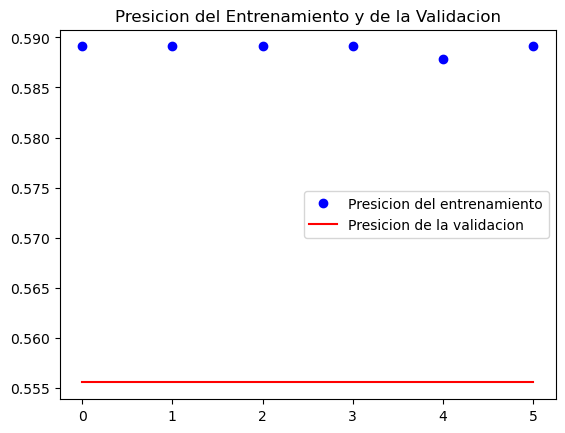

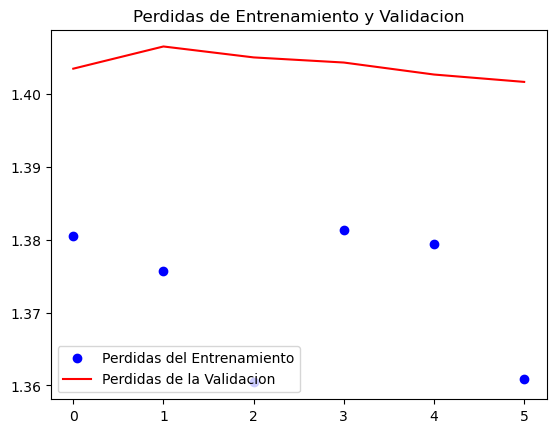

In [20]:
accuracy = Entrenamiento_de_Carnes.history['Accuracy']
val_accuracy = Entrenamiento_de_Carnes.history['val_Accuracy']
loss = Entrenamiento_de_Carnes.history['loss']
val_loss = Entrenamiento_de_Carnes.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Presicion del entrenamiento')
plt.plot(epochs, val_accuracy, 'r', label='Presicion de la validacion')
plt.title('Presicion del Entrenamiento y de la Validacion')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Perdidas del Entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Perdidas de la Validacion')
plt.title('Perdidas de Entrenamiento y Validacion')
plt.legend()
plt.show()

In [21]:
predicted_classes2 = Modelo_Clases_Carnes.predict(test_X)

In [22]:
predicted_classes=[]
for predicted_meat in predicted_classes2:
    predicted_classes.append(predicted_meat.tolist().index(max(predicted_meat)))
predicted_classes=np.array(predicted_classes)

In [23]:
predicted_classes.shape, test_Y.shape

((343,), (343,))

Found 202  correct labels


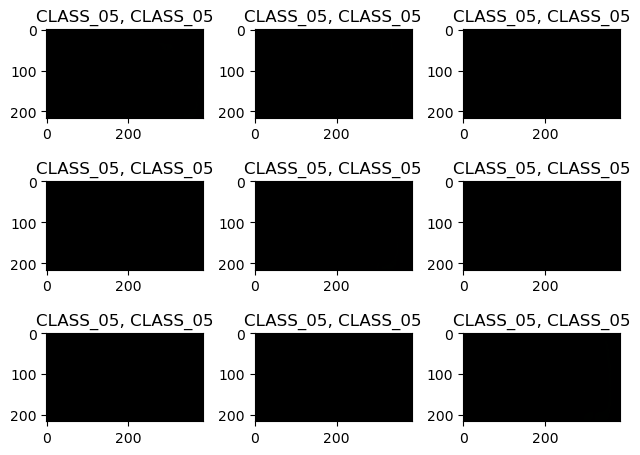

In [24]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d  correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(216,384,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(clases_de_carnes[predicted_classes[correct]],
                                                    clases_de_carnes[test_Y[correct]]))

    plt.tight_layout()

Found 141 incorrect labels


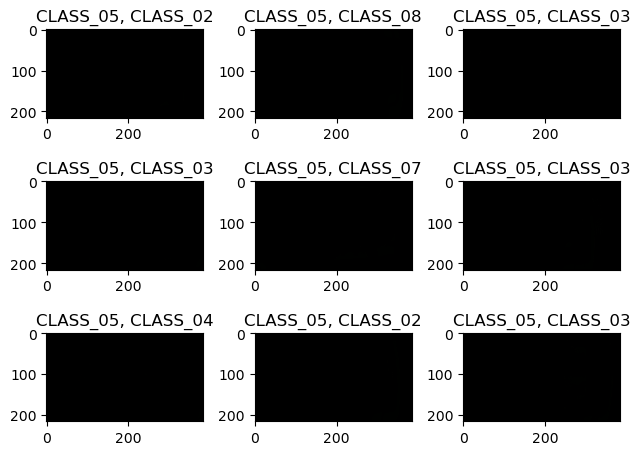

In [25]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(216,384,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(clases_de_carnes[predicted_classes[incorrect]],
                                                    clases_de_carnes[test_Y[incorrect]]))
    plt.tight_layout()

In [26]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00        15
     Class 1       0.00      0.00      0.00        51
     Class 2       0.00      0.00      0.00        15
     Class 3       0.59      1.00      0.74       202
     Class 4       0.00      0.00      0.00        10
     Class 5       0.00      0.00      0.00        37
     Class 6       0.00      0.00      0.00        13

    accuracy                           0.59       343
   macro avg       0.08      0.14      0.11       343
weighted avg       0.35      0.59      0.44       343



C:\Users\TIGRE15JHAC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\TIGRE15JHAC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\TIGRE15JHAC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
from skimage.transform import resize

images=[]
# AQUI ESPECIFICAMOS UNAS IMAGENES
filenames = ['CarneDatasettest/06-CAPTURE_20220523_061532_229.png']

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (216, 384),anti_aliasing=True,clip=False,preserve_range=True)
    images.append(image_resized)

X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X / 255.

predicted_classes = Modelo_Clases_Carnes.predict(test_X)

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], clases_de_carnes[img_tagged.tolist().index(max(img_tagged))])

CarneDatasettest/06-CAPTURE_20220523_061532_229.png CLASS_05


In [28]:
print (predicted_classes)

[[0.0259624  0.13158904 0.07755135 0.554632   0.03451134 0.12155465
  0.05419919]]


In [29]:
plt.show()

In [32]:
predicted_classes3 = Modelo_Clases_Carnes.predict(test_X)

In [33]:
print (predicted_classes3)

[[0.0259624  0.13158904 0.07755135 0.554632   0.03451134 0.12155465
  0.05419919]]


In [36]:
print ("Accuracy", accuracy)
print ("Precision", val_accuracy)


Accuracy [0.589090883731842, 0.589090883731842, 0.589090883731842, 0.589090883731842, 0.5878787636756897, 0.589090883731842]
Precision [0.5555555820465088, 0.5555555820465088, 0.5555555820465088, 0.5555555820465088, 0.5555555820465088, 0.5555555820465088]


In [74]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import plotly.express as px    

df = pd.DataFrame(np.random.random((100,7)), columns = [j for j in range(6)] + ["true"])

df_binned = pd.DataFrame()
for col in df.columns:
    df_binned[col] = pd.cut(df[col], bins=[0,0.25, 0.5, 0.75, 1.0], labels=list("lmhs"))

# generate confusion matrix 
cm = confusion_matrix(y_true=df_binned.true, y_pred=df_binned[0])

# plot
px.imshow(cm).show()